In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os 
import osmnx as ox
import networkx as nx


In [2]:
nodes_dict = {'Fuß- & Radtunnel Südportal - Derendinger Allee': (48.518, 9.04806),
 'Neckartalradweg Hirschau - parallel L371': (48.50357, 9.02496),
 'Radbrücke Mitte - Wöhrdstraße': (48.5178, 9.06091),
 'Radbrücke Ost': (48.51824, 9.06905),
 'Unterführung Steinlach/Karlstraße Südseite - Steinlachallee': (48.515434, 9.058865)}
df_nodes = pd.DataFrame(nodes_dict).T
df_nodes.columns = ['lat', 'lon']

In [3]:

center=(48.518, 9.04806)
G = ox.graph_from_point(center, dist=3000, network_type='bike')
center_node = ox.distance.nearest_nodes(G, X=center[1], Y=center[0])
# 'Fuß- & Radtunnel Südportal - Derendinger Allee': (48.518, 9.04806)
lengths = nx.shortest_path_length(G, source=center_node, weight="length")
print(lengths)


{6407838832: 0, 2479514410: np.float64(7.2166700010047204), 6419441998: np.float64(169.6660063776553), 6419441999: np.float64(174.9697670985975), 5923864720: np.float64(181.09357743723137), 5963782788: np.float64(184.92558356648306), 2471378979: np.float64(186.3190758174374), 392962380: np.float64(190.25880777916746), 5798554499: np.float64(190.5624757156452), 5963782810: np.float64(216.51524965261697), 4172780070: np.float64(227.88310658015806), 6137251938: np.float64(235.29368180163925), 10223912325: np.float64(250.67228215097452), 6137251941: np.float64(253.14252753743773), 11828673999: np.float64(260.4798038682085), 11828674001: np.float64(262.2718937909608), 4172780078: np.float64(271.04696138210835), 11045944036: np.float64(276.4019691002088), 5115984648: np.float64(277.442534626349), 5115984649: np.float64(282.1187573609333), 11045944033: np.float64(285.4266356439384), 2479491236: np.float64(292.5433398572618), 11045944026: np.float64(294.9018782011351), 11045944029: np.float64(

In [4]:
subG = nx.ego_graph(
    G,
    center_node,
    radius=3000,
    distance="length"
)

subG = subG.subgraph(
    max(nx.strongly_connected_components(subG), key=len)
).copy()

In [5]:
must_include_nodes = []

for name, (lat, lon) in nodes_dict.items():
    nearest_node = ox.distance.nearest_nodes(subG, X=lon, Y=lat)
    must_include_nodes.append(nearest_node)

In [6]:
lengths2 = nx.single_source_dijkstra_path_length(subG, source=center_node, weight="length")
print(lengths2)
candidates = sorted(lengths2, key = lengths2.get)
print(candidates)

{6407838832: 0, 2479514410: np.float64(7.2166700010047204), 6419441998: np.float64(169.6660063776553), 6419441999: np.float64(174.9697670985975), 5923864720: np.float64(181.09357743723137), 5963782788: np.float64(184.92558356648306), 2471378979: np.float64(186.3190758174374), 392962380: np.float64(190.25880777916746), 5798554499: np.float64(190.5624757156452), 5963782810: np.float64(216.51524965261697), 4172780070: np.float64(227.88310658015806), 6137251938: np.float64(235.29368180163925), 10223912325: np.float64(250.67228215097452), 6137251941: np.float64(253.14252753743773), 11828673999: np.float64(260.4798038682085), 11828674001: np.float64(262.2718937909608), 4172780078: np.float64(271.04696138210835), 11045944036: np.float64(276.4019691002088), 5115984648: np.float64(277.442534626349), 5115984649: np.float64(282.1187573609333), 11045944033: np.float64(285.4266356439384), 2479491236: np.float64(292.5433398572618), 11045944026: np.float64(294.9018782011351), 11045944029: np.float64(

In [7]:
MIN_DIST = 200
selected = []

for u in candidates:
    if not selected:
        selected.append(u)
        continue

    near = nx.single_source_dijkstra_path_length(
        subG, source=u, cutoff=MIN_DIST, weight="length"
    )
    if not any(n in near for n in selected):
        selected.append(u)

print(selected)

[6407838832, 5963782810, 4172780070, 2479491236, 11333175674, 5798801562, 4448543778, 114133435, 30412169, 11038197460, 6218246861, 129957697, 12797769192, 13261728901, 95957849, 114147409, 114141357, 4462109210, 129982530, 6152272258, 11341045844, 266797333, 8521014742, 1757678016, 243874783, 4571398986, 12398862349, 13351639512, 7941137191, 10947977154, 2478182796, 2524751570, 1661068932, 11608081441, 2654033881, 249606898, 1656914402, 266797353, 5111461121, 26896490, 7611327542, 10727302917, 27149818, 3364485731, 114141310, 114147592, 114154006, 4360517612, 5933703593, 1655228679, 2056107535, 2470364621, 1698691559, 4571398953, 305108025, 3856126157, 27149904, 305108029, 36716532, 266797416, 5903223051, 6134784699, 266902450, 173546722, 2481774742, 243465273, 974752295, 305162570, 2532098690, 276985381, 3880745647, 1698691626, 5111410851, 1807845730, 12961654713, 288255201, 2405234534, 344309767, 5722512951, 846969859, 272812291, 67094825, 6652844015, 36716701, 13049564587, 10681933

In [ ]:
final_selected = list(selected) 

for n in must_include_nodes:
    if n not in final_selected:
        final_selected.append(n)

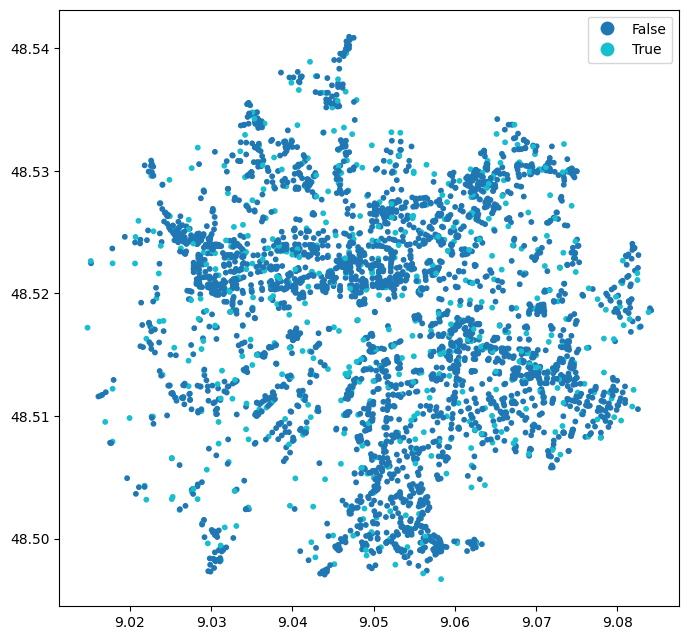

In [9]:
gdf = ox.graph_to_gdfs(subG, nodes=True, edges=False)
gdf["selected"] = gdf.index.isin(final_selected)

ax = gdf.plot(
    column="selected",
    categorical=True,
    legend=True,
    figsize=(8,8),
    markersize=10
)

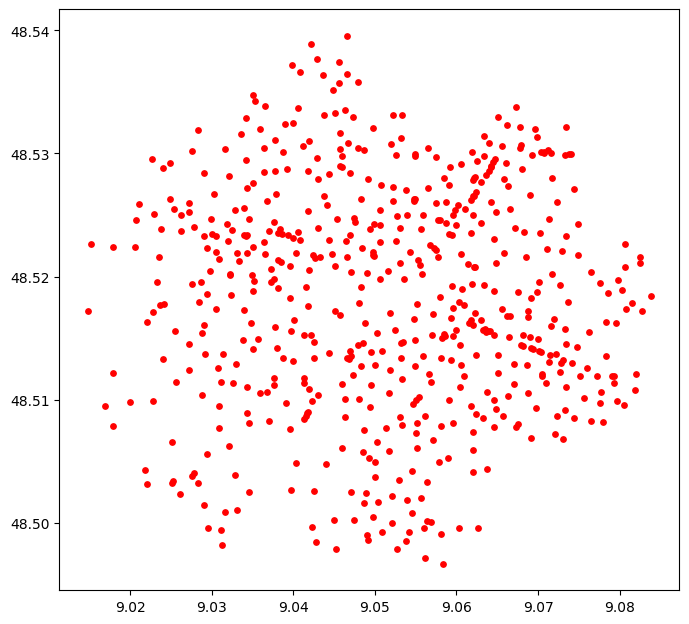

In [10]:
selected_gdf = gdf[gdf["selected"]]

# Plotten
ax = selected_gdf.plot(
    color="red",
    markersize=15,
    figsize=(8,8)
)



In [11]:
lengths = dict(lengths)

drop_keys = [k for k, v in lengths.items() if v < 200]
for k in drop_keys:
    lengths.pop(k)

print(lengths)
nodes = ox.graph_to_gdfs(G, edges=False)
print(nodes.head())
nodes["network_distance_m"] = nodes.index.map(lengths)

{5963782810: np.float64(216.51524965261697), 4172780070: np.float64(227.88310658015806), 6137251938: np.float64(235.29368180163925), 10223912325: np.float64(250.67228215097452), 6137251941: np.float64(253.14252753743773), 11828673999: np.float64(260.4798038682085), 11828674001: np.float64(262.2718937909608), 4172780078: np.float64(271.04696138210835), 11045944036: np.float64(276.4019691002088), 5115984648: np.float64(277.442534626349), 5115984649: np.float64(282.1187573609333), 11045944033: np.float64(285.4266356439384), 2479491236: np.float64(292.5433398572618), 11045944026: np.float64(294.9018782011351), 11045944029: np.float64(300.0024286751607), 11045944035: np.float64(301.60626610664775), 1855933449: np.float64(304.99514667563136), 11052214854: np.float64(305.7261597689181), 11045944023: np.float64(308.6693845157078), 11045944031: np.float64(312.9665851569614), 11341045843: np.float64(315.06371103568694), 11927826965: np.float64(320.48614417123855), 11045944005: np.float64(321.661

[6407838832, 247094243, 11333015516, 1817455565, 34825890]


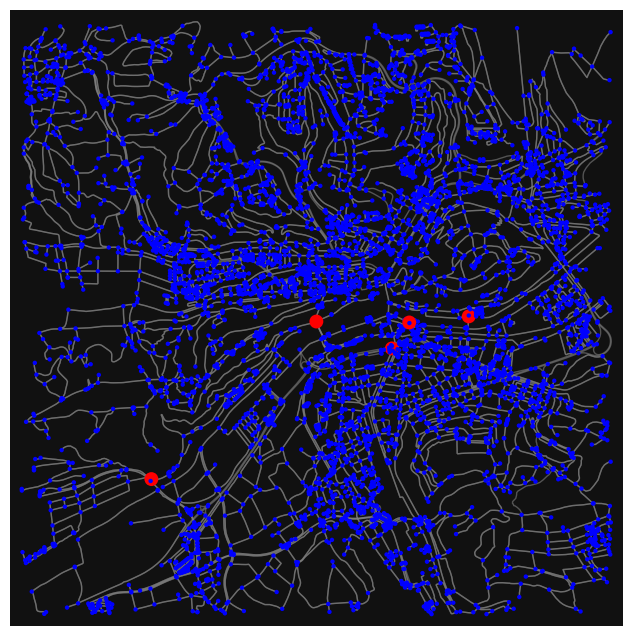

In [12]:
existing_sites_coords = list(nodes_dict.values())
existing_sites_nodes = [ox.distance.nearest_nodes(G, X=lon, Y=lat) for lat, lon in existing_sites_coords]
print(existing_sites_nodes)
node_colors = ['red' if n in existing_sites_nodes else 'blue' for n in G.nodes()]

fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=[100 if n in existing_sites_nodes else 10 for n in G.nodes()],
    edge_color="gray",
    edge_alpha=0.6
)

In [13]:
all_lengths = {}
for site_node in existing_sites_nodes:
    lengths = nx.shortest_path_length(G, source=site_node, weight='length')
    all_lengths = lengths

print(all_lengths)
all_lengths = dict(all_lengths)
print(all_lengths)
drop_keys1 = [k for k, v in all_lengths.items() if v < 200]
for k in drop_keys1:
    all_lengths.pop(k)

print(all_lengths)


{34825890: 0, 34825889: np.float64(23.098675826818813), 34825888: np.float64(30.62845525577616), 2608168206: np.float64(43.150035042246984), 1698691823: np.float64(72.5943180924104), 92622427: np.float64(84.7726258094577), 34825892: np.float64(84.83263396173652), 537990715: np.float64(97.58785192500979), 13068261172: np.float64(155.84823896758795), 34825884: np.float64(168.81260822175852), 12516785378: np.float64(173.06814976493237), 26921272: np.float64(198.6141187213571), 1698691974: np.float64(208.9418586153834), 4644054077: np.float64(220.56569393187925), 1698691984: np.float64(236.855579542417), 5928384624: np.float64(238.0131705368608), 5928384623: np.float64(247.14362886296755), 2555523916: np.float64(247.63539692465395), 26921270: np.float64(252.27707045955452), 331279316: np.float64(252.87475678787172), 5928384625: np.float64(256.9120012277802), 2529884733: np.float64(271.60188273933034), 5928384634: np.float64(272.47336426005097), 11160450111: np.float64(279.1961003028308), 3

In [14]:
min_dist_to_site = []
for n in G.nodes():
    dists = [all_lengths.get(n, np.inf) for site_node in existing_sites_nodes]
    min_dist_to_site.append(min(dists))

nodes['min_dist_to_site'] = min_dist_to_site
print(min(nodes['min_dist_to_site']))
nodes_finite = nodes[np.isfinite(nodes['min_dist_to_site'])].copy()
print(max(nodes_finite['min_dist_to_site']))

208.9418586153834
6260.436932469459


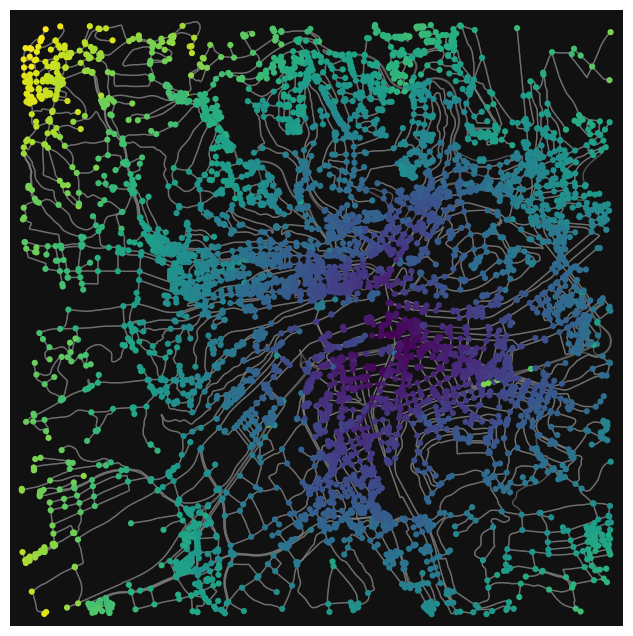

In [15]:
node_colors = nodes['min_dist_to_site'].values

fig, ax = ox.plot_graph(
    G,
    node_color=node_colors,
    node_size=20,
    node_zorder=3,
    edge_color="gray",
    edge_alpha=0.6,
    show=True,
    close=False
)

In [16]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [17]:
nodes_finite = nodes[np.isfinite(nodes['min_dist_to_site'])].copy()
nodes_sampled = nodes_finite.sample(n=500, random_state=42) 
X = nodes_sampled[['x','y']].values
y = nodes_sampled['min_dist_to_site'].replace(np.inf, 5000).values

# GP Kernel
kernel = C(1.0, (1e-3, 1e3)) * RBF(length_scale=0.005, length_scale_bounds=(1e-5, 1))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=5, alpha=1e-2)

gp.fit(X, y)
y_pred, sigma = gp.predict(X, return_std=True)
nodes_sampled['gp_pred'] = y_pred
nodes_sampled['gp_std'] = sigma

c:\Users\Crabsi\AppData\Local\Python\pythoncore-3.14-64\Lib\site-packages\sklearn\gaussian_process\kernels.py:450: ConvergenceWarning: The optimal value found for dimension 0 of parameter k1__constant_value is close to the specified upper bound 1000.0. Increasing the bound and calling fit again may find a better value.
  warnings.warn(


KeyError: 34825890

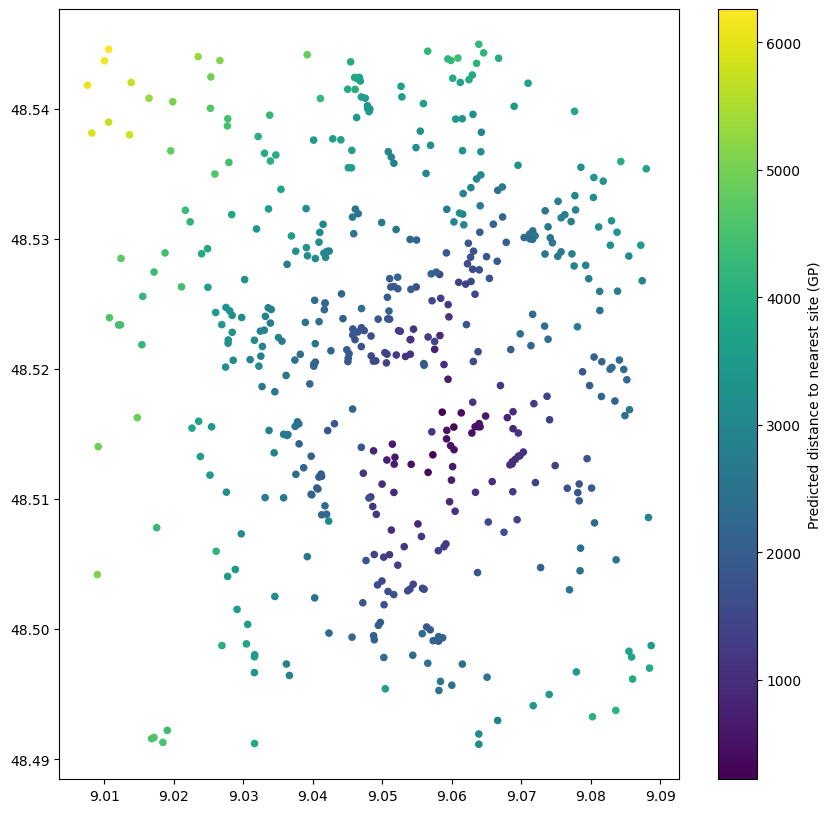

In [18]:
plt.figure(figsize=(10,10))
plt.scatter(nodes_sampled['x'], nodes_sampled['y'], c=nodes_sampled['gp_pred'], cmap='viridis', s=20)
plt.colorbar(label='Predicted distance to nearest site (GP)')
# bestehende Sites markieren
existing_x = [nodes_finite.loc[n, 'x'] for n in existing_sites_nodes]
existing_y = [nodes_finite.loc[n, 'y'] for n in existing_sites_nodes]
plt.scatter(existing_x, existing_y, color='red', s=50, label='Existing Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Gaussian Process Prediction for Next Counter Sites')
plt.legend()
plt.show()